# Exploring Data with Python

A significant part of a a data scientist's role is to explore, analyze, and visualize data. There's a wide range of tools and programming languages that they can use to do this; and of the most popular approaches is to use Jupyter notebooks (like this one) and Python.

Python is a flexible programming language that is used in a wide range of scenarios; from web applications to device programming. It's extremely popular in the data science and machine learning community because of the many packages it supports for data analysis and visualization.

In this notebook, we'll explore some of these packages, and apply basic techniques to analyze data. This is not intended to be a comprehensive Python programming exercise; or even a deep dive into data analysis. Rather, it's intended as a crash course in some of the common ways in which data scientists can use Python to work with data.

> **Note**: If you've never used the Jupyter Notebooks environment before, there are a few things you should be aware of:
> 
> - Notebooks are made up of *cells*. Some cells (like this one) contain *markdown* text, while others (like the one beneath this one) contain code.
> - You can run each code cell by using the **&#9658; Run** button. the **&#9658; Run** button will show up when you hover over the cell.
> - The output from each code cell will be displayed immediately below the cell.
> - Even though the code cells can be run individually, some variables used in the code are global to the notebook. That means that you should run all of the code cells <u>**in order**</u>. There may be dependencies between code cells, so if you skip a cell, subsequent cells might not run correctly.


## Exploring data arrays with NumPy

Lets start by looking at some simple data.

Suppose a college takes a sample of student grades for a data science class.

Run the code in the cell below by clicking the **&#9658; Run** button to see the data.

In [6]:
data = [50,50,47,97,49,3,53,42,26,74,82,62,37,15,70,27,36,35,48,52,63,64]
print(data)

[50, 50, 47, 97, 49, 3, 53, 42, 26, 74, 82, 62, 37, 15, 70, 27, 36, 35, 48, 52, 63, 64]


{'whiskers': [<matplotlib.lines.Line2D at 0x1c243ddd348>,
 'caps': [<matplotlib.lines.Line2D at 0x1c243de20c8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c243dd9ac8>],
 'medians': [<matplotlib.lines.Line2D at 0x1c243de2d48>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c243de8348>],
 'means': []}

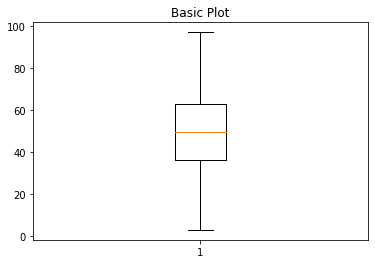

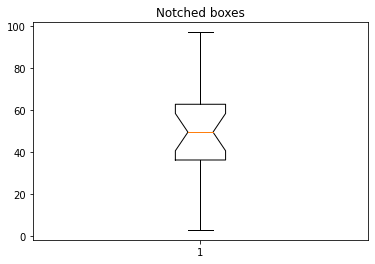

In [8]:
import matplotlib.pyplot as plt

fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(data)

fig2, ax2 = plt.subplots()
ax2.set_title('Notched boxes')
ax2.boxplot(data, notch=True)

The data has been loaded into a Python **list** structure, which is a good data type for general data manipulation, but not optimized for numeric analysis. For that, we're going to use the **NumPy** package, which includes specific data types and functions for working with *Num*bers in *Py*thon.

Run the cell below to load the data into a NumPy **array**.

In [ ]:
import numpy as np

grades = np.array(data)
print(grades)

Just in case you're wondering about the differences between a **list** and a NumPy **array**, let's compare how these data types behave when we use them in an expression that multiplies them by 2.

In [ ]:
print (type(data),'x 2:', data * 2)
print('---')
print (type(grades),'x 2:', grades * 2)

Note that multiplying a list by 2 creates a new list of twice the length with the original sequence of list elements repeated. Multiplying a NumPy array on the other hand performs an element-wise calculation in which the array behaves like a *vector*, so we end up with an array of the same size in which each element has been multiplied by 2.

The key takeaway from this is that NumPy arrays are specifically designed to support mathematical operations on numeric data - which makes them more useful for data analysis than a generic list.

You might have spotted that the class type for the numpy array above is a **numpy.ndarray**. The **nd** indicates that this is a structure that can consists of multiple *dimensions* (it can have *n* dimensions). Our specific instance has a single dimension of student grades.

Run the cell below to view the **shape** of the array.

In [ ]:
grades.shape

The shape confirms that this array has only one dimension, which contains 22 elements (there are 22 grades in the original list). You can access the individual elements in the array by their zero-based ordinal position. Let's get the first element (the one in position 0).

In [ ]:
grades[0]

Alright, now you know your way around a NumPy array, it's time to perform some analysis of the grades data.

You can apply aggregations across the elements in the array, so let's find the simple average grade (in other words, the *mean* grade value).

In [ ]:
grades.mean()

So the mean grade is just around 50 - more or less in the middle of the possible range from 0 to 100.

Let's add a second set of data for the same students, this time recording the typical number of hours per week they devoted to studying.

In [ ]:
# Define an array of study hours
study_hours = [10.0,11.5,9.0,16.0,9.25,1.0,11.5,9.0,8.5,14.5,15.5,
               13.75,9.0,8.0,15.5,8.0,9.0,6.0,10.0,12.0,12.5,12.0]

# Create a 2D array (an array of arrays)
student_data = np.array([study_hours, grades])

# display the array
student_data

Now the data consists of a 2-dimensional array - an array of arrays. Let's look at its shape.

In [ ]:
# Show shape of 2D array
student_data.shape

The **student_data** array contains two elements, each of which is an array containing 22 elements.

To navigate this structure, you need to specify the position of each element in the hierarchy. So to find the first value in the first array (which contains the study hours data), you can use the following code.

In [ ]:
# Show the first element of the first element
student_data[0][0]

Now you have a multidimensional array containing both the student's study time and grade information, which you can use to compare data. For example, how does the mean study time compare to the mean grade?

In [ ]:
# Get the mean value of each sub-array
avg_study = student_data[0].mean()
avg_grade = student_data[1].mean()

print('Average study hours: {:.2f}\nAverage grade: {:.2f}'.format(avg_study, avg_grade))

## Exploring tabular data with Pandas

While NumPy provides a lot of the functionality you need to work with numbers, and specifically arrays of numeric values; when you start to deal with two-dimensional tables of data, the **Pandas** package offers a more convenient structure to work with - the **DataFrame**.

Run the following cell to import the Pandas library and create a DataFrame with three columns. The first column is a list of student names, and the second and third columns are the NumPy arrays containing the study time and grade data.

In [ ]:
import pandas as pd

df_students = pd.DataFrame({'Name': ['Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic', 'Jimmie', 
                                     'Rhonda', 'Giovanni', 'Francesca', 'Rajab', 'Naiyana', 'Kian', 'Jenny',
                                     'Jakeem','Helena','Ismat','Anila','Skye','Daniel','Aisha'],
                            'StudyHours':student_data[0],
                            'Grade':student_data[1]})

df_students 

Note that in addition to the columns you specified, the DataFrame includes an *index* to unique identify each row. We could have specified the index explicitly, and assigned any kind of appropriate value (for example, an email address); but because we didn't specify an index, one has been created with a unique integer value for each row.

### Finding and filtering data in a DataFrame

You can use the DataFrame's **loc** method to retrieve data for a specific index value, like this.

In [ ]:
# Get the data for index value 5
df_students.loc[5]

You can also get the data at a range of index values, like this:

In [ ]:
# Get the rows with index values from 0 to 5
df_students.loc[0:5]

In addition to being able to use the **loc** method to find rows based on the index, you can use the **iloc** method to find rows based on their ordinal position in the DataFrame (regardless of the index):

In [ ]:
# Get data in the first five rows
df_students.iloc[0:5]

Look carefully at the `iloc[0:5]` results, and compare them to the `loc[0:5]` results you obtained previously. Can you spot the difference?

The **loc** method returned rows with index *label* in the list of values from *0* to *5* - which includes *0*, *1*, *2*, *3*, *4*, and *5* (six rows). However, the **iloc** method returns the rows in the *positions* included in the range 0 to 5, and since integer ranges don't include the upper-bound value, this includes positions *0*, *1*, *2*, *3*, and *4* (five rows).

**iloc** identifies data values in a DataFrame by *position*, which extends beyond rows to columns. So for example, you can use it to find the values for the columns in positions 1 and 2 in row 0, like this:

In [ ]:
df_students.iloc[0,[1,2]]

Let's return to the **loc** method, and see how it works with columns. Remember that **loc** is used to locate data items based on index values rather than positions. In the absence of an explicit index column, the rows in our dataframe are indexed as integer values, but the columns are identified by name:

In [ ]:
df_students.loc[0,'Grade']

Here's another useful trick. You can use the **loc** method to find indexed rows based on a filtering expression that references named columns other than the index, like this:

In [ ]:
df_students.loc[df_students['Name']=='Aisha']

Actually, you don't need to explicitly use the **loc** method to do this - you can simply apply a DataFrame filtering expression, like this:

In [ ]:
df_students[df_students['Name']=='Aisha']

And for good measure, you can achieve the same results by using the DataFrame's **query** method, like this:

In [ ]:
df_students.query('Name=="Aisha"')

The three previous examples underline an occassionally confusing truth about working with Pandas. Often, there are multiple ways to achieve the same results. Another example of this is the way you refer to a DataFrame column name. You can specify the column name as a named index value (as in the `df_students['Name']` examples we've seen so far), or you can use the column as a property of the DataFrame, like this:

In [ ]:
df_students[df_students.Name == 'Aisha']

### Loading a DataFrame from a  file

We constructed the DataFrame from some existing arrays. However, in many real-world scenarios, data is loaded from sources such as files. Let's replace the student grades DataFrame with the contents of a text file.

In [ ]:
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/grades.csv
df_students = pd.read_csv('grades.csv',delimiter=',',header='infer')
df_students.head()

The DataFrame's **read_csv** method is used to load data from text files. As you can see in the example code, you can specify options such as the column delimiter and which row (if any) contains column headers (in this case, the delimiter is a comma and the first row contains the column names - these are the default settings, so the parameters could have been omitted).


### Handling missing values

One of the most common issues data scientists need to deal with is incomplete or missing data. So how would we know that the DataFrame contains missing values? You can use the **isnull** method to identify which individual values are null, like this:

In [ ]:
df_students.isnull()

Of course, with a larger DataFrame, it would be inefficient to review all of the rows and columns individually; so we can get the sum of missing values for each column, like this:

In [ ]:
df_students.isnull().sum()

So now we know that there's one missing **StudyHours** value, and two missing **Grade** values.

To see them in context, we can filter the dataframe to include only rows where any of the columns (axis 1 of the DataFrame) are null.

In [ ]:
df_students[df_students.isnull().any(axis=1)]

When the DataFrame is retrieved, the missing numeric values show up as **NaN** (*not a number*).

So now that we've found the null values, what can we do about them?

One common approach is to *impute* replacement values. For example, if the number of study hours is missing, we could just assume that the student studied for an average amount of time and replace the missing value with the mean study hours. To do this, we can use the **fillna** method, like this:

In [ ]:
df_students.StudyHours = df_students.StudyHours.fillna(df_students.StudyHours.mean())
df_students

Alternatively, it might be important to ensure that you only use data you know to be absolutely correct; so you can drop rows or columns that contains null values by using the **dropna** method. In this case, we'll remove rows (axis 0 of the DataFrame) where any of the columns contain null values.

In [ ]:
df_students = df_students.dropna(axis=0, how='any')
df_students

### Explore data in the DataFrame

Now that we've cleaned up the missing values, we're ready to explore the data in the DataFrame. Let's start by comparing the mean study hours and grades.

In [ ]:
# Get the mean study hours using to column name as an index
mean_study = df_students['StudyHours'].mean()

# Get the mean grade using the column name as a property (just to make the point!)
mean_grade = df_students.Grade.mean()

# Print the mean study hours and mean grade
print('Average weekly study hours: {:.2f}\nAverage grade: {:.2f}'.format(mean_study, mean_grade))

OK, let's filter the DataFrame to find only the students who studied for more than the average amount of time.

In [ ]:
# Get students who studied for the mean or more hours
df_students[df_students.StudyHours > mean_study]

Note that the filtered result is itself a DataFrame, so you can work with its columns just like any other DataFrame.

For example, let's find the average grade for students who undertook more than the average amount of study time.

In [ ]:
# What was their mean grade?
df_students[df_students.StudyHours > mean_study].Grade.mean()

Let's assume that the passing grade for the course is 60.

We can use that information to add a new column to the DataFrame, indicating whether or not each student passed.

First, we'll create a Pandas **Series** containing the pass/fail indicator (True or False), and then we'll concatenate that series as a new column (axis 1) in the DataFrame.

In [ ]:
passes  = pd.Series(df_students['Grade'] >= 60)
df_students = pd.concat([df_students, passes.rename("Pass")], axis=1)

df_students

DataFrames are designed for tabular data, and you can use them to perform many of the kinds of data analytics operation you can do in a relational database; such as grouping and aggregating tables of data.

For example, you can use the **groupby** method to group the student data into groups based on the **Pass** column you added previously, and count the number of names in each group - in other words, you can determine how many students passed and failed.

In [ ]:
print(df_students.groupby(df_students.Pass).Name.count())

You can aggregate multiple fields in a group using any available aggregation function. For example, you can find the mean study time and grade for the groups of students who passed and failed the course.

In [ ]:
print(df_students.groupby(df_students.Pass)['StudyHours', 'Grade'].mean())

DataFrames are amazingly versatile, and make it easy to manipulate data. Many DataFrame operations return a new copy of the DataFrame; so if you want to modify a DataFrame but keep the existing variable, you need to assign the result of the operation to the existing variable. For example, the following code sorts the student data into descending order of Grade, and assigns the resulting sorted DataFrame to the original **df_students** variable.

In [ ]:
# Create a DataFrame with the data sorted by Grade (descending)
df_students = df_students.sort_values('Grade', ascending=False)

# Show the DataFrame
df_students

## Summary

That's it for now! 

Numpy and DataFrames are the workhorses of data science in Python. They provide us ways to load, explore, and analyze tabular data. As we will see in subsequent modules, even advanced analysis methods typically rely on Numpy and Pandas for these important roles.

In our next workbook, we'll take a look at how create graphs and explore your data in more interesting ways.